# Case: Demand forecasting using a Machine Learning solution

# Data Reading

In [1]:
import pandas as pd

In [194]:
data = pd.read_csv('datos_fd.csv',sep=',')
data.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,MODELO,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,156.99835,138.92,NaN,NaN,NaN,641
1,201502,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,124.06427,120.87,NaN,NaN,NaN,148
2,201503,10CLPY-1900LL0-SC001,L,COGNAC,PTY,SPT,NaN,278.67054,273.85,NaN,NaN,NaN,524


La descripción de los campos del presente dataset

<table>

<tr>
<th>Variable</th>
<th>Descripción</th>
</tr>

<tr>
<td>FECDETALLE</td>
<td>Mes de análisis</td>
</tr>

<tr>
<td>CODIGO_SAP</td>
<td>Identificador del producto</td>
</tr>

<tr>
<td>TALLA</td>
<td>Talla del producto</td>
</tr>

<tr>
<td>COLORES</td>
<td>Color del producto</td>
</tr>

<tr>
<td>MODELO</td>
<td>Modelo del producto</td>
</tr>

<tr>
<td>TIPO</td>
<td>Tipo del producto</td>
</tr>

<tr>
<td>PROM_FLG_DEPARTAMENTO_1_4_U3M_M2</td>
<td>Demanda promedio de hace 2 meses respecto al promedio de los últimos 3 meses en las zonas 1 y 4</td>
</tr>

<tr>
<td>TOT_PRECIO_CDESC_M0</td>
<td>Precio c/desuento el último mes</td>
</tr>

<tr>
<td>TOT_PRECIO_M0</td>
<td>Precio el último mes</td>
</tr>

<tr>
<td>PROM_FLG_SUBCANAL_1_1_U3M_M1</td>
<td>Demanda promedio de los últimos 3 respecto al último mes en el subcanal 1</td>
</tr>

<tr>
<td>PROM_FLG_DEPARTAMENTO_1_4_U3M_M1</td>
<td>Demanda promedio de hace 1 mes respecto al promedio de los últimos 3 meses en las zonas 1 y 4</td>
</tr>

<tr>
<td>PROM_FLG_SUBCANAL_1_1_U3M_M2</td>
<td>Demanda promedio de los últimos 3 respecto a la demanda de hace 2 meses en el subcanal 1</td>
</tr>

<tr>
<td>CLASS</td>
<td>Demanda</td>
</tr>

</table>

# Entendimiento de los datos

In [196]:
data.shape

(4680, 13)

Diferenciamos las variables por naturaleza

In [197]:
data.columns.values

array(['FECDETALLE', 'CODIGO_SAP', 'TALLA', 'COLORES', 'MODELO', 'TIPO',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M2', 'TOT_PRECIO_CDESC_M0',
       'TOT_PRECIO_M0', 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1', 'PROM_FLG_SUBCANAL_1_1_U3M_M2',
       'CLASS'], dtype=object)

Variables numéricas

In [198]:
inputs_num = ['PROM_FLG_DEPARTAMENTO_1_4_U3M_M2', 'TOT_PRECIO_CDESC_M0',
       'TOT_PRECIO_M0', 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
       'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1', 'PROM_FLG_SUBCANAL_1_1_U3M_M2']

In [199]:
res_data_num = data[inputs_num].describe().transpose()
res_data_num

,count,mean,std,min,25%,50%,75%,max
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4162.0,322.328433,468.040398,0.000,44.550000,131.953333,386.039167,3402.266667
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590
PROM_FLG_SUBCANAL_1_1_U3M_M1,4268.0,124.945173,197.696594,0.000,19.000000,47.000000,137.000000,1556.000000
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4268.0,322.625974,466.693218,0.000,45.233333,132.476667,386.547755,3402.266667
PROM_FLG_SUBCANAL_1_1_U3M_M2,4162.0,125.225372,198.557014,0.000,19.000000,47.000000,136.750000,1556.000000


Imputamos las variables con información faltante

In [200]:
res_data_num['pct_perdido'] = 1 - (res_data_num['count']/data.shape[0])
res_data_num

,count,mean,std,min,25%,50%,75%,max,pct_perdido
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4162.0,322.328433,468.040398,0.000,44.550000,131.953333,386.039167,3402.266667,0.110684
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130,0.000000
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590,0.000000
PROM_FLG_SUBCANAL_1_1_U3M_M1,4268.0,124.945173,197.696594,0.000,19.000000,47.000000,137.000000,1556.000000,0.088034
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4268.0,322.625974,466.693218,0.000,45.233333,132.476667,386.547755,3402.266667,0.088034
PROM_FLG_SUBCANAL_1_1_U3M_M2,4162.0,125.225372,198.557014,0.000,19.000000,47.000000,136.750000,1556.000000,0.110684


In [201]:
data[inputs_num] = data[inputs_num].fillna(data[inputs_num].median())

In [202]:
data[inputs_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4680.0,301.257001,445.396766,0.000,52.173453,131.953333,341.874285,3402.266667
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590
PROM_FLG_SUBCANAL_1_1_U3M_M1,4680.0,118.083333,190.079855,0.000,21.000000,47.000000,120.000000,1556.000000
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4680.0,305.886334,448.918507,0.000,50.200000,132.476667,351.735613,3402.266667
PROM_FLG_SUBCANAL_1_1_U3M_M2,4680.0,116.567094,188.845758,0.000,22.000000,47.000000,117.000000,1556.000000


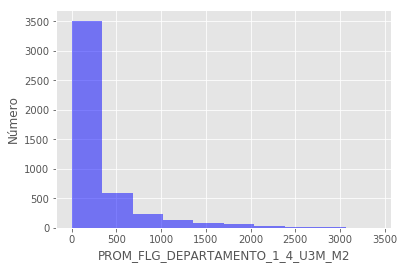

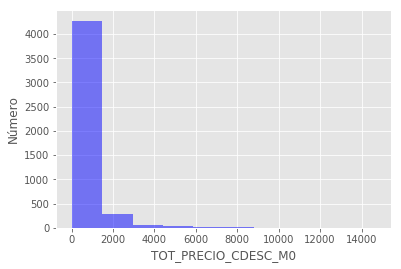

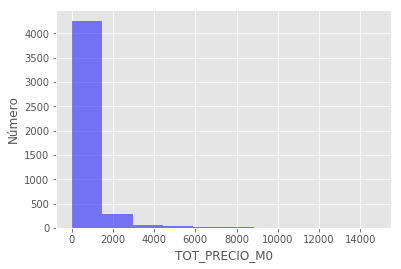

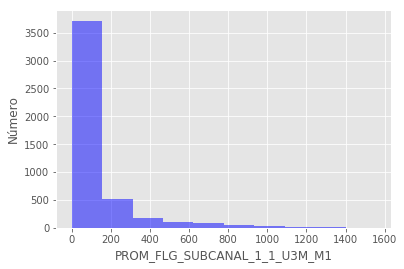

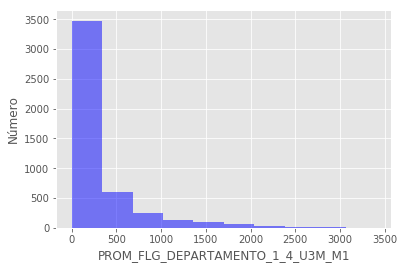

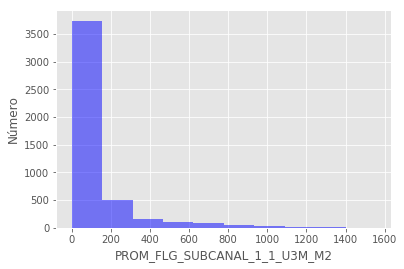

In [203]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.style.use('ggplot')
num_bins = 10
data_0 = data

for i in inputs_num:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

Variables Categóricas

In [204]:
inputs_cat = ['TALLA', 'COLORES', 'MODELO', 'TIPO']

In [205]:
res_data_cat = data[inputs_cat].describe(include='all').transpose()
res_data_cat

,count,unique,top,freq
TALLA,4680,4,M,1245
COLORES,4680,15,NEGRO,630
MODELO,4680,1,PTY,4680
TIPO,3892,2,SPT,1958


Imputamos información faltante

In [206]:
res_data_cat['pct_perdido'] = 1 - (res_data_cat['count']/data.shape[0])
res_data_cat

,count,unique,top,freq,pct_perdido
TALLA,4680,4,M,1245,0
COLORES,4680,15,NEGRO,630,0
MODELO,4680,1,PTY,4680,0
TIPO,3892,2,SPT,1958,0.168376


In [207]:
data['TIPO'] = data['TIPO'].fillna('SIN_INFO')

In [208]:
res_data_cat = data[inputs_cat].describe(include='all').transpose()
res_data_cat['pct_perdido'] = 1 - (res_data_cat['count']/data.shape[0])
res_data_cat

,count,unique,top,freq,pct_perdido
TALLA,4680,4,M,1245,0
COLORES,4680,15,NEGRO,630,0
MODELO,4680,1,PTY,4680,0
TIPO,4680,3,SPT,1958,0


In [209]:
data.groupby(['TIPO']).CODIGO_SAP.count()

TIPO
CPT         1934
SIN_INFO     788
SPT         1958
Name: CODIGO_SAP, dtype: int64

In [210]:
data = data.drop(['MODELO'], axis=1)

Analizamos la variable a estimar

In [211]:
data.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,156.99835,138.92,47.0,132.476667,47.0,641
1,201502,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,124.06427,120.87,47.0,132.476667,47.0,148
2,201503,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,278.67054,273.85,47.0,132.476667,47.0,524


In [213]:
data_fin_X = data[['FECDETALLE','CODIGO_SAP','CLASS']].loc[data['CODIGO_SAP']=='10CLPY-2000LL0-SC001']
data_fin_X

,FECDETALLE,CODIGO_SAP,CLASS
1958,201501,10CLPY-2000LL0-SC001,51
1959,201502,10CLPY-2000LL0-SC001,71
1960,201503,10CLPY-2000LL0-SC001,284
1961,201504,10CLPY-2000LL0-SC001,504
1962,201505,10CLPY-2000LL0-SC001,53
1963,201506,10CLPY-2000LL0-SC001,226
1964,201507,10CLPY-2000LL0-SC001,129
1965,201508,10CLPY-2000LL0-SC001,156
1966,201509,10CLPY-2000LL0-SC001,287
1967,201510,10CLPY-2000LL0-SC001,257


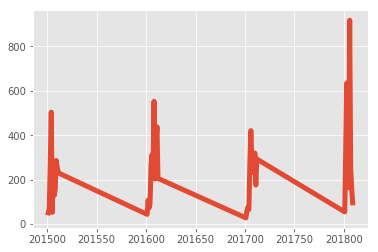

In [214]:
from matplotlib import pyplot as plt

plt.plot(data_fin_X['FECDETALLE'],data_fin_X['CLASS'], linewidth=5.0) #create the plot

Analizamos la presencia de outliers

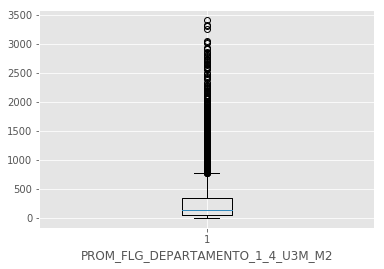

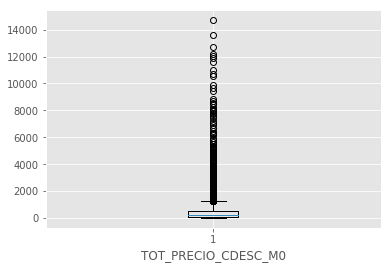

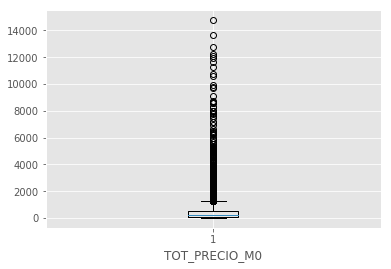

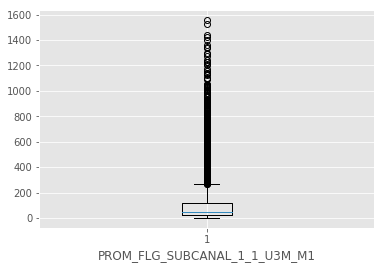

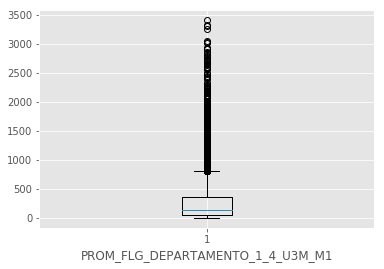

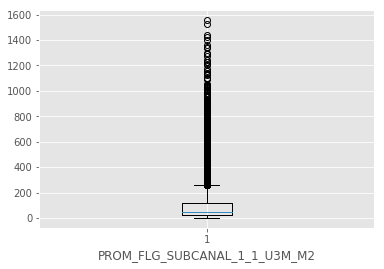

In [215]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

for i in inputs_num:
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

Calculamos la asimetría de las variables

In [216]:
from scipy import stats 
import pandas as pd


data_ca = {'Variable' : inputs_num,
       'Coeficiente_Asim' : stats.skew(data[inputs_num])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coeficiente_Asim
0,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,2.876120
1,TOT_PRECIO_CDESC_M0,5.793763
2,TOT_PRECIO_M0,5.588627
3,PROM_FLG_SUBCANAL_1_1_U3M_M1,3.203722
4,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,2.817616
5,PROM_FLG_SUBCANAL_1_1_U3M_M2,3.258753


Analizamos el nivel de dispersión de las variables

In [217]:
res_data_num = data[inputs_num].describe().transpose()
res_data_num['cv'] = res_data_num.iloc[:,2] / res_data_num.iloc[:,1] * 100
res_data_num

,count,mean,std,min,25%,50%,75%,max,cv
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,4680.0,301.257001,445.396766,0.000,52.173453,131.953333,341.874285,3402.266667,147.846113
TOT_PRECIO_CDESC_M0,4680.0,529.999730,1051.235491,4.508,69.536500,197.307600,537.780145,14701.436130,198.346420
TOT_PRECIO_M0,4680.0,548.231868,1084.551578,4.900,71.843050,203.608800,550.784500,14762.849590,197.827168
PROM_FLG_SUBCANAL_1_1_U3M_M1,4680.0,118.083333,190.079855,0.000,21.000000,47.000000,120.000000,1556.000000,160.970943
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,4680.0,305.886334,448.918507,0.000,50.200000,132.476667,351.735613,3402.266667,146.759909
PROM_FLG_SUBCANAL_1_1_U3M_M2,4680.0,116.567094,188.845758,0.000,22.000000,47.000000,117.000000,1556.000000,162.006062


# Preparación de los datos

In [218]:
data.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,156.99835,138.92,47.0,132.476667,47.0,641
1,201502,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,124.06427,120.87,47.0,132.476667,47.0,148
2,201503,10CLPY-1900LL0-SC001,L,COGNAC,SPT,131.953333,278.67054,273.85,47.0,132.476667,47.0,524


Transformación de las variables categóricas

In [219]:
inputs_cat = ['TALLA','COLORES','TIPO']

In [221]:
from sklearn.preprocessing import LabelEncoder

In [222]:
for i in inputs_cat:
    le = LabelEncoder()
    le.fit(data[str(i)])
    data[str(i)]=le.transform(data[str(i)])

In [223]:
data.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,0,6,2,131.953333,156.99835,138.92,47.0,132.476667,47.0,641
1,201502,10CLPY-1900LL0-SC001,0,6,2,131.953333,124.06427,120.87,47.0,132.476667,47.0,148
2,201503,10CLPY-1900LL0-SC001,0,6,2,131.953333,278.67054,273.85,47.0,132.476667,47.0,524


Estandarizamos las variables

In [224]:
data_inputs = data.iloc[:,:-1]
data_inputs = data_inputs.iloc[:,2:]
data_inputs.head(3)

,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2
0,0,6,2,131.953333,156.99835,138.92,47.0,132.476667,47.0
1,0,6,2,131.953333,124.06427,120.87,47.0,132.476667,47.0
2,0,6,2,131.953333,278.67054,273.85,47.0,132.476667,47.0


In [225]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(data_inputs)
transformer
RobustScaler()

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [226]:
data_inputs_s = transformer.transform(data_inputs)

In [227]:
inputs = data_inputs.columns.tolist()

In [228]:
data_inputs_s = pd.DataFrame(data_inputs_s,columns=inputs)

In [229]:
data_inputs_s.head(3)

,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2
0,-0.5,-0.25,0.5,0.0,-0.086086,-0.135066,0.0,0.0,0.0
1,-0.5,-0.25,0.5,0.0,-0.156421,-0.172753,0.0,0.0,0.0
2,-0.5,-0.25,0.5,0.0,0.173762,0.146659,0.0,0.0,0.0


Consolidamos las variables transformadas y el target

In [230]:
data.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,0,6,2,131.953333,156.99835,138.92,47.0,132.476667,47.0,641
1,201502,10CLPY-1900LL0-SC001,0,6,2,131.953333,124.06427,120.87,47.0,132.476667,47.0,148
2,201503,10CLPY-1900LL0-SC001,0,6,2,131.953333,278.67054,273.85,47.0,132.476667,47.0,524


In [231]:
data_fin = pd.concat([data.iloc[:,:2],data_inputs_s,data.iloc[:,-1]],axis=1)
data_fin.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,0.0,-0.086086,-0.135066,0.0,0.0,0.0,641
1,201502,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,0.0,-0.156421,-0.172753,0.0,0.0,0.0,148
2,201503,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,0.0,0.173762,0.146659,0.0,0.0,0.0,524


In [232]:
data_fin_2_X = data_fin[['FECDETALLE','CODIGO_SAP','CLASS']].loc[data_fin['CODIGO_SAP']=='10CLPY-2000LL0-SC001']
data_fin_2_X

,FECDETALLE,CODIGO_SAP,CLASS
1958,201501,10CLPY-2000LL0-SC001,51
1959,201502,10CLPY-2000LL0-SC001,71
1960,201503,10CLPY-2000LL0-SC001,284
1961,201504,10CLPY-2000LL0-SC001,504
1962,201505,10CLPY-2000LL0-SC001,53
1963,201506,10CLPY-2000LL0-SC001,226
1964,201507,10CLPY-2000LL0-SC001,129
1965,201508,10CLPY-2000LL0-SC001,156
1966,201509,10CLPY-2000LL0-SC001,287
1967,201510,10CLPY-2000LL0-SC001,257


Analizamos la correlación

In [237]:
data_fin.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
0,201501,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,0.0,-0.086086,-0.135066,0.0,0.0,0.0,641
1,201502,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,0.0,-0.156421,-0.172753,0.0,0.0,0.0,148
2,201503,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,0.0,0.173762,0.146659,0.0,0.0,0.0,524


In [236]:
data_fin.iloc[:,2:].corr()

,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
TALLA,1.000000,0.011563,0.003058,-0.183168,-0.168749,-0.170059,-0.168147,-0.186757,-0.164857,-0.160730
COLORES,0.011563,1.000000,0.000634,0.225348,0.143457,0.143431,0.199209,0.228085,0.196657,0.171250
TIPO,0.003058,0.000634,1.000000,0.291787,0.073271,0.073993,0.307906,0.295397,0.303062,0.215179
PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,-0.183168,0.225348,0.291787,1.000000,0.319405,0.320388,0.914259,0.965523,0.944362,0.681315
TOT_PRECIO_CDESC_M0,-0.168749,0.143457,0.073271,0.319405,1.000000,0.997537,0.310878,0.315448,0.297637,0.562194
TOT_PRECIO_M0,-0.170059,0.143431,0.073993,0.320388,0.997537,1.000000,0.314309,0.318742,0.299357,0.567415
PROM_FLG_SUBCANAL_1_1_U3M_M1,-0.168147,0.199209,0.307906,0.914259,0.310878,0.314309,1.000000,0.944316,0.961377,0.698303
PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,-0.186757,0.228085,0.295397,0.965523,0.315448,0.318742,0.944316,1.000000,0.921810,0.687360
PROM_FLG_SUBCANAL_1_1_U3M_M2,-0.164857,0.196657,0.303062,0.944362,0.297637,0.299357,0.961377,0.921810,1.000000,0.686029
CLASS,-0.160730,0.171250,0.215179,0.681315,0.562194,0.567415,0.698303,0.687360,0.686029,1.000000


Particionamos los datos

In [238]:
data_fin.groupby(['FECDETALLE']).CODIGO_SAP.count()

FECDETALLE
201501     96
201502     87
201503    105
201504    105
201505    106
201506    106
201507    105
201508    104
201509    106
201510    106
201511    104
201512    105
201601     94
201602    106
201603    101
201604    105
201605    106
201606    106
201607    106
201608    106
201609    105
201610    105
201611    106
201612    106
201701    101
201702    105
201703    106
201704    103
201705    106
201706    106
201707    106
201708    105
201709    106
201710    106
201711    106
201712    104
201801    106
201802    106
201803    106
201804    106
201805    105
201806    106
201807    106
201808    106
201809     86
Name: CODIGO_SAP, dtype: int64

In [287]:
n = data_fin.shape[1]

In [288]:
X_train = data_fin.loc[data_fin['FECDETALLE']<201801]
y_train = X_train.iloc[:,-1].values
n_cols = X_train.iloc[:,2:(n-1)].columns.tolist()
X_train = X_train.iloc[:,2:(n-1)].values

In [290]:
n_cols

['TALLA',
 'COLORES',
 'TIPO',
 'PROM_FLG_DEPARTAMENTO_1_4_U3M_M2',
 'TOT_PRECIO_CDESC_M0',
 'TOT_PRECIO_M0',
 'PROM_FLG_SUBCANAL_1_1_U3M_M1',
 'PROM_FLG_DEPARTAMENTO_1_4_U3M_M1',
 'PROM_FLG_SUBCANAL_1_1_U3M_M2']

In [291]:
X_test = data_fin.loc[data_fin['FECDETALLE']>=201801]
y_test = X_test.iloc[:,-1].values
X_test = X_test.iloc[:,2:(n-1)].values

# Aprendizaje de un algoritmo

# Random Forest

In [271]:
from sklearn.model_selection import cross_val_score
# list of values to try for n_estimators
estimator_range = range(100, 200, 10)

# list to store the average Accuracy for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(criterion='mse',n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    

In [272]:
RMSE_scores

[564.0143208677734,
 561.5395206178024,
 561.0756821388661,
 561.245484614122,
 561.2622537914488,
 559.8052029252265,
 560.336249675545,
 559.5960123784855,
 559.0372878219612,
 558.6567361026791]

Text(0,0.5,'RMSE (lower is better)')

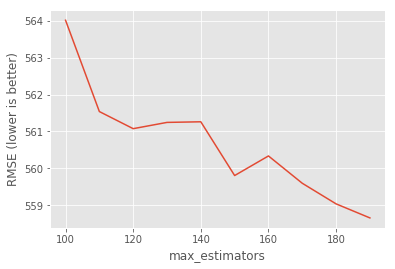

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('max_estimators')
plt.ylabel('RMSE (lower is better)')

In [274]:
from sklearn.model_selection import cross_val_score
# list of values to try for n_estimators
estimator_range = range(200, 300, 10)

# list to store the average Accuracy for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(criterion='mse',n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

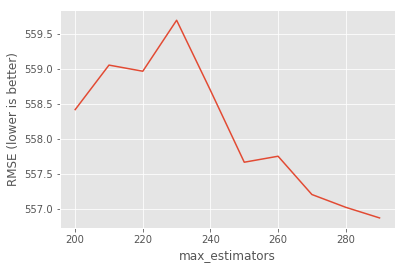

In [275]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('max_estimators')
plt.ylabel('RMSE (lower is better)')

In [276]:
from sklearn.model_selection import cross_val_score
# list of values to try for n_estimators
estimator_range = range(300, 400, 10)

# list to store the average Accuracy for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(criterion='mse',n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

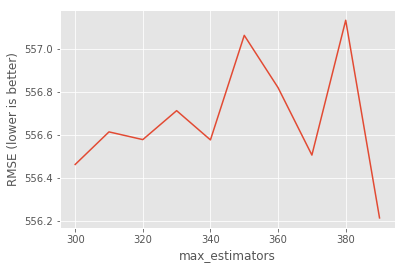

In [277]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('max_estimators')
plt.ylabel('RMSE (lower is better)')

In [278]:
from sklearn.model_selection import cross_val_score
# list of values to try for n_estimators
estimator_range = range(400, 500, 10)

# list to store the average Accuracy for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(criterion='mse',n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

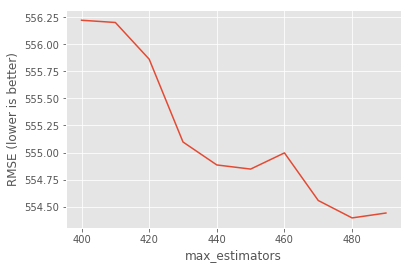

In [279]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('max_estimators')
plt.ylabel('RMSE (lower is better)')

In [280]:
from sklearn.model_selection import cross_val_score
# list of values to try for n_estimators
estimator_range = range(500, 600, 10)

# list to store the average Accuracy for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(criterion='mse',n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

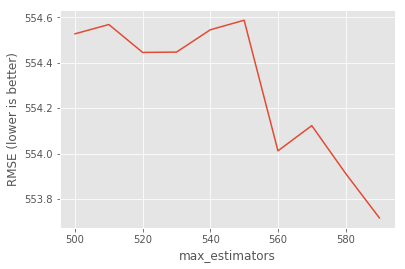

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('max_estimators')
plt.ylabel('RMSE (lower is better)')

In [282]:
from sklearn.model_selection import cross_val_score
# list of values to try for n_estimators
estimator_range = range(600, 700, 10)

# list to store the average Accuracy for each value of n_estimators
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfreg = RandomForestRegressor(criterion='mse',n_estimators=estimator, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

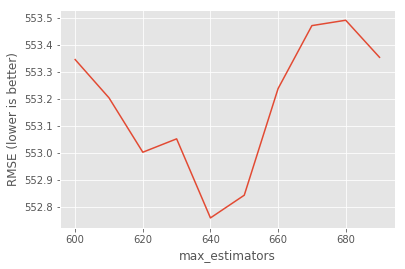

In [283]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('max_estimators')
plt.ylabel('RMSE (lower is better)')

In [296]:
# list of values to try for max_features
feature_range = range(1, len(n_cols)+1) 

# list to store the average Accuracy for each value of max_features
RMSE_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=640, max_features=feature, random_state=1, n_jobs=-1)
    MSE_scores = cross_val_score(rfreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

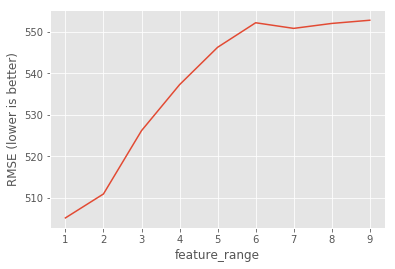

In [298]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, RMSE_scores)
plt.xlabel('feature_range')
plt.ylabel('RMSE (lower is better)')

In [299]:
rfreg = RandomForestRegressor(n_estimators=640, max_features=2, random_state=1, n_jobs=-1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=640, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [300]:
pd.DataFrame({'feature':n_cols, 'importance':rfreg.feature_importances_}).sort_values('importance')

,feature,importance
0,TALLA,0.010277
2,TIPO,0.023293
1,COLORES,0.025415
8,PROM_FLG_SUBCANAL_1_1_U3M_M2,0.135441
7,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,0.139171
6,PROM_FLG_SUBCANAL_1_1_U3M_M1,0.147624
3,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,0.151920
5,TOT_PRECIO_M0,0.172361
4,TOT_PRECIO_CDESC_M0,0.194499


In [301]:
ypredRF = rfreg.predict(X_test)

In [302]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, ypredRF))
print('MSE:', metrics.mean_squared_error(y_test, ypredRF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypredRF)))

MAE: 263.0782340233119
MSE: 342020.0411686386
RMSE: 584.824795275165


In [303]:
ypredRF

array([ 396.35      ,  412.3171875 ,  397.0203125 ,  418.5203125 ,
        607.340625  ,  883.784375  ,  494.40625   ,  611.525     ,
        163.090625  ,   71.2       ,   18.9109375 ,   84.15      ,
         61.1796875 ,   46.725     ,   55.0140625 ,   50.7625    ,
         88.5015625 ,   97.840625  ,  114.1796875 ,  164.940625  ,
        118.9359375 ,  172.9828125 ,  210.3015625 ,  166.6875    ,
        139.2828125 ,   21.1625    ,  207.1609375 ,  214.0375    ,
        441.653125  ,  285.8171875 ,  463.6046875 ,  510.2796875 ,
        435.340625  ,  446.45625   ,  165.7390625 , 1275.10625   ,
       1099.9609375 , 1645.6109375 , 2405.290625  , 5396.90625   ,
       4192.9328125 , 3598.353125  , 4879.8734375 ,  574.55      ,
         53.35      ,   54.525     ,  101.7390625 ,   66.78125   ,
         93.7234375 ,  171.321875  ,  124.28125   ,  162.4609375 ,
         33.9640625 ,  976.921875  ,  935.6578125 , 1705.371875  ,
       1867.7890625 , 3575.471875  , 2926.31875   , 2607.45312

In [304]:
data_test = data_fin.loc[data_fin['FECDETALLE']>=201801]
data_test.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS
36,201801,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.757606,0.233175,0.221709,1.808081,1.856464,1.621053,307
37,201802,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.934110,0.243759,0.233288,2.141414,2.273883,1.884211,757
38,201803,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,2.368581,0.214007,0.202600,2.020202,2.332582,2.231579,1146


In [305]:
data_test['CLASS_est'] = ypredRF

C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [306]:
data_test.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS,CLASS_est
36,201801,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.757606,0.233175,0.221709,1.808081,1.856464,1.621053,307,396.350000
37,201802,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.934110,0.243759,0.233288,2.141414,2.273883,1.884211,757,412.317187
38,201803,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,2.368581,0.214007,0.202600,2.020202,2.332582,2.231579,1146,397.020312


In [310]:
data_test['error']=data_test['CLASS_est']-data_test['CLASS']
data_test['error_abs']=np.absolute(data_test['CLASS_est']-data_test['CLASS'])

C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [311]:
data_test.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS,CLASS_est,error,error_abs
36,201801,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.757606,0.233175,0.221709,1.808081,1.856464,1.621053,307,396.350000,89.350000,89.350000
37,201802,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.934110,0.243759,0.233288,2.141414,2.273883,1.884211,757,412.317187,-344.682813,344.682813
38,201803,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,2.368581,0.214007,0.202600,2.020202,2.332582,2.231579,1146,397.020312,-748.979687,748.979687


In [318]:
data_test['error_abs_d']=data_test['error_abs']/data_test['CLASS']

C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [319]:
data_test.head(3)

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,PROM_FLG_SUBCANAL_1_1_U3M_M2,CLASS,CLASS_est,error,error_abs,error_abs_d
36,201801,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.757606,0.233175,0.221709,1.808081,1.856464,1.621053,307,396.350000,89.350000,89.350000,0.291042
37,201802,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.934110,0.243759,0.233288,2.141414,2.273883,1.884211,757,412.317187,-344.682813,344.682813,0.455327
38,201803,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,2.368581,0.214007,0.202600,2.020202,2.332582,2.231579,1146,397.020312,-748.979687,748.979687,0.653560


In [338]:
data_test.error_abs_d.mean()

1.7235253193945996

In [317]:
df1 = pd.DataFrame(data_test.groupby(['CODIGO_SAP']).error.mean())

In [320]:
df2 = pd.DataFrame(data_test.groupby(['CODIGO_SAP']).error_abs_d.mean())

In [331]:
df3 = pd.concat([df1,df2],axis=1)

In [332]:
df3.head(3)

,error,error_abs_d
CODIGO_SAP,,
10CLPY-1900LL0-SC001,-53.849479,2.587061
10CLPY-1900LL0-SC002,8.930469,0.741531
10CLPY-1900LL0-SC003,-1.520660,2.820177


In [350]:
df3.sort_values(['error_abs_d'],ascending=[True])

,error,error_abs_d
CODIGO_SAP,,
10CLPY-1900XL0-SC040,-22.029861,0.418287
10CLPY-1900MM0-SC003,-19.743359,0.424137
10CLPY-1900SS0-SC003,-13.479883,0.510815
10CLPY-1900SS0-SC045,17.929883,0.572146
10INPY-008ALL0-SC325,-42.333333,0.589790
10CLPY-1900SS0-SC040,0.984180,0.592245
10CLPY-1900SS0-SC041,-21.549609,0.595644
10CLPY-1900XL0-SC005,-185.313715,0.603168
10INPY-008AMM0-SC325,-42.469271,0.630473


# Light GBM

In [339]:
from sklearn.model_selection import GridSearchCV, train_test_split
import lightgbm as lgb

In [340]:
params = {
        'task':'train', 
        'is_unbalance': False,
        'max_dept':5,
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': 15,
        'learning_rate': 0.1,
        'feature_fraction': 0.7,
        'bagging_fraction': 0.7,
        'verbose': 0, 
        'seed ':1234
}

In [341]:
dtrain = lgb.Dataset(pd.DataFrame(X_train), pd.DataFrame(y_train))
dtest = lgb.Dataset(pd.DataFrame(X_test), pd.DataFrame(y_test), reference=dtrain)

In [344]:
gbm = lgb.train(params,
            dtrain,
            num_boost_round=100,
            valid_sets=[dtrain,dtest],
            early_stopping_rounds=10
            )

[1]	training's rmse: 992.242	valid_1's rmse: 942.868
Training until validation scores don't improve for 10 rounds.
[2]	training's rmse: 917.211	valid_1's rmse: 888.69
[3]	training's rmse: 850.791	valid_1's rmse: 851.129
[4]	training's rmse: 791.241	valid_1's rmse: 809.861
[5]	training's rmse: 737.183	valid_1's rmse: 775.796
[6]	training's rmse: 693.207	valid_1's rmse: 751.055
[7]	training's rmse: 652.974	valid_1's rmse: 725.05
[8]	training's rmse: 617.463	valid_1's rmse: 703.913
[9]	training's rmse: 584.949	valid_1's rmse: 689.353
[10]	training's rmse: 555.362	valid_1's rmse: 677.547
[11]	training's rmse: 535.688	valid_1's rmse: 663.589
[12]	training's rmse: 513.484	valid_1's rmse: 653.12
[13]	training's rmse: 493.734	valid_1's rmse: 646.647
[14]	training's rmse: 477.788	valid_1's rmse: 638.16
[15]	training's rmse: 462.769	valid_1's rmse: 633.367
[16]	training's rmse: 449.489	valid_1's rmse: 629.362
[17]	training's rmse: 438.569	valid_1's rmse: 623.19
[18]	training's rmse: 429.92	valid

In [346]:
ypredLGBM = gbm.predict(X_test, ntree_limit=gbm.best_iteration)
ypredLGBM

array([ 351.6481515 ,  351.6481515 ,  376.97069846,  313.98332492,
        745.23297821,  914.41213732,  399.53020351,  526.74006531,
        150.42759781,   77.85775034,   72.42261314,   94.79888527,
         72.42261314,   59.34059647,   51.87612687,   68.67558893,
         81.7168686 ,   80.90524391,  112.50925747,  179.57932494,
        141.54127947,  166.56641584,  197.79466577,  145.62436432,
        141.90512823,   59.62831271,  224.9669026 ,  224.9669026 ,
        378.13433816,  269.9765781 ,  355.23076101,  397.47977527,
        349.85932184,  339.68044908,  161.72007434, 1194.58283083,
       1202.63283081, 1398.42098425, 2157.61522011, 5140.50864856,
       3275.56154917, 3606.09698507, 5091.04975455,  832.55439743,
         84.11449252,   79.73311622,  123.39382088,   89.69130259,
        104.80410172,  199.31696312,  120.81058028,  214.97039374,
         62.05209175,  864.76101295, 1036.85752343, 1914.61426476,
       2027.16324032, 2951.85925746, 2851.9038763 , 2575.99164

In [347]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, ypredLGBM))
print('MSE:', metrics.mean_squared_error(y_test, ypredLGBM))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypredLGBM)))

MAE: 265.924393097837
MSE: 361063.4612188413
RMSE: 600.8855641624629


In [348]:
data_test['CLASS_est_2'] = ypredLGBM
data_test['error_2']=data_test['CLASS_est_2']-data_test['CLASS']
data_test['error_abs_2']=np.absolute(data_test['CLASS_est_2']-data_test['CLASS'])
data_test['error_abs_d_2']=data_test['error_abs_2']/data_test['CLASS']
df4 = pd.DataFrame(data_test.groupby(['CODIGO_SAP']).error_2.mean())
df5 = pd.DataFrame(data_test.groupby(['CODIGO_SAP']).error_abs_d_2.mean())
df6 = pd.concat([df4,df5],axis=1)
df6.head(3)

C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,error_2,error_abs_d_2
CODIGO_SAP,,
10CLPY-1900LL0-SC001,-82.045188,2.349103
10CLPY-1900LL0-SC002,21.763880,1.329969
10CLPY-1900LL0-SC003,0.672666,7.117737


In [351]:
df6.sort_values(['error_abs_d_2'],ascending=[True])

,error_2,error_abs_d_2
CODIGO_SAP,,
10CLPY-1900SS0-SC041,-90.337215,0.414754
10CLPY-1900MM0-SC003,-11.691382,0.437821
10CLPY-1900SS0-SC040,-16.788226,0.479295
10INPY-008ALL0-SC325,-40.313564,0.628437
10INPY-008AMM0-SC325,-38.978338,0.649292
10CLPY-1900SS0-SC003,-6.845990,0.658846
10CLPY-1900XL0-SC040,-7.798401,0.675804
10CLPY-1900XL0-SC005,-185.859544,0.685047
10CLPY-1900MM0-SC040,-71.077318,0.699454


# Regresión Lineal

In [353]:
from sklearn import linear_model

In [354]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [355]:
ypredRL = lm.predict(X_test)

In [356]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, ypredRL))
print('MSE:', metrics.mean_squared_error(y_test, ypredRL))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypredRL)))

MAE: 311.8715860490799
MSE: 366190.68034474377
RMSE: 605.1369104134566


In [357]:
data_test['CLASS_est_3'] = ypredRL
data_test['error_3']=data_test['CLASS_est_3']-data_test['CLASS']
data_test['error_abs_3']=np.absolute(data_test['CLASS_est_3']-data_test['CLASS'])
data_test['error_abs_d_3']=data_test['error_abs_3']/data_test['CLASS']
data_test.head(3)

C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,...,error_abs,error_abs_d,CLASS_est_2,error_2,error_abs_2,error_abs_d_2,CLASS_est_3,error_3,error_abs_3,error_abs_d_3
36,201801,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.757606,0.233175,0.221709,1.808081,1.856464,...,89.350000,0.291042,351.648152,44.648152,44.648152,0.145434,866.258087,559.258087,559.258087,1.821688
37,201802,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.934110,0.243759,0.233288,2.141414,2.273883,...,344.682813,0.455327,351.648152,-405.351848,405.351848,0.535471,983.375269,226.375269,226.375269,0.299043
38,201803,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,2.368581,0.214007,0.202600,2.020202,2.332582,...,748.979687,0.653560,376.970698,-769.029302,769.029302,0.671055,999.394883,-146.605117,146.605117,0.127928


In [359]:
data_test['CLASS_est_4'] = (data_test['CLASS_est']+data_test['CLASS_est_2']+data_test['CLASS_est_3'])/3
data_test.head(3)

C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,...,error_abs_d,CLASS_est_2,error_2,error_abs_2,error_abs_d_2,CLASS_est_3,error_3,error_abs_3,error_abs_d_3,CLASS_est_4
36,201801,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.757606,0.233175,0.221709,1.808081,1.856464,...,0.291042,351.648152,44.648152,44.648152,0.145434,866.258087,559.258087,559.258087,1.821688,538.085413
37,201802,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.934110,0.243759,0.233288,2.141414,2.273883,...,0.455327,351.648152,-405.351848,405.351848,0.535471,983.375269,226.375269,226.375269,0.299043,582.446869
38,201803,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,2.368581,0.214007,0.202600,2.020202,2.332582,...,0.653560,376.970698,-769.029302,769.029302,0.671055,999.394883,-146.605117,146.605117,0.127928,591.128631


In [361]:
ypredProm = data_test['CLASS_est_4'].values
ypredProm

array([ 5.38085413e+02,  5.82446869e+02,  5.91128631e+02,  6.13750266e+02,
        8.17619541e+02,  9.51618413e+02,  6.22058474e+02,  7.07818446e+02,
        3.66198523e+02,  7.68582391e+01,  5.83920078e+01,  9.37178188e+01,
        7.74212377e+01,  5.31819398e+01,  3.60373001e+01,  3.32882885e+01,
        6.39547816e+01,  9.34797391e+01,  1.13682452e+02,  1.71003127e+02,
        1.48058680e+02,  1.71525418e+02,  1.85754797e+02,  1.52901370e+02,
        1.43899507e+02,  5.71237675e+01,  3.56824954e+02,  3.77501900e+02,
        5.28378286e+02,  4.60673009e+02,  5.12653600e+02,  4.87648811e+02,
        4.16690885e+02,  4.22825093e+02,  2.72133684e+02,  1.83772198e+03,
        1.84352994e+03,  2.15069116e+03,  2.72598705e+03,  4.67579570e+03,
        3.47547300e+03,  3.30378934e+03,  4.22404927e+03,  1.17513756e+03,
        9.23582440e+01,  9.55214584e+01,  1.33418853e+02,  1.04414121e+02,
        1.06158956e+02,  1.69057481e+02,  1.06693319e+02,  1.65907076e+02,
        3.25848586e+01,  

In [362]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, ypredProm))
print('MSE:', metrics.mean_squared_error(y_test, ypredProm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypredProm)))

MAE: 257.56449588322647
MSE: 301136.5045884553
RMSE: 548.7590587757576


In [372]:
data_test['CLASS_est_5'] = (data_test['CLASS_est']*0.25+data_test['CLASS_est_2']*0.25+data_test['CLASS_est_3']*0.5)
data_test.head(3)

C:\Users\jspr_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,FECDETALLE,CODIGO_SAP,TALLA,COLORES,TIPO,PROM_FLG_DEPARTAMENTO_1_4_U3M_M2,TOT_PRECIO_CDESC_M0,TOT_PRECIO_M0,PROM_FLG_SUBCANAL_1_1_U3M_M1,PROM_FLG_DEPARTAMENTO_1_4_U3M_M1,...,CLASS_est_2,error_2,error_abs_2,error_abs_d_2,CLASS_est_3,error_3,error_abs_3,error_abs_d_3,CLASS_est_4,CLASS_est_5
36,201801,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.757606,0.233175,0.221709,1.808081,1.856464,...,351.648152,44.648152,44.648152,0.145434,866.258087,559.258087,559.258087,1.821688,538.085413,620.128581
37,201802,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,1.934110,0.243759,0.233288,2.141414,2.273883,...,351.648152,-405.351848,405.351848,0.535471,983.375269,226.375269,226.375269,0.299043,582.446869,682.678969
38,201803,10CLPY-1900LL0-SC001,-0.5,-0.25,0.5,2.368581,0.214007,0.202600,2.020202,2.332582,...,376.970698,-769.029302,769.029302,0.671055,999.394883,-146.605117,146.605117,0.127928,591.128631,693.195194


In [373]:
ypredPromP = data_test['CLASS_est_5'].values
ypredPromP

array([ 6.20128581e+02,  6.82678969e+02,  6.93195194e+02,  7.37499490e+02,
        8.88285911e+02,  9.77878491e+02,  7.09603597e+02,  7.77161403e+02,
        4.70918229e+02,  7.80229211e+01,  6.47546241e+01,  9.58395070e+01,
        8.27312814e+01,  5.32565105e+01,  2.73334028e+01,  2.00729106e+01,
        5.33775647e+01,  9.55331414e+01,  1.13851442e+02,  1.70374704e+02,
        1.56968716e+02,  1.72400820e+02,  1.76608139e+02,  1.51274090e+02,
        1.45552275e+02,  6.54879480e+01,  4.27205471e+02,  4.56501749e+02,
        5.87620563e+02,  5.52061072e+02,  5.64271538e+02,  5.04533351e+02,
        4.28736341e+02,  4.37703465e+02,  3.26335742e+02,  2.13916070e+03,
        2.18964646e+03,  2.46502877e+03,  2.94825412e+03,  4.37933982e+03,
        3.34608592e+03,  3.15457149e+03,  3.84334311e+03,  1.41093024e+03,
        1.04171243e+02,  1.09717658e+02,  1.43845058e+02,  1.17503043e+02,
        1.09606550e+02,  1.60926513e+02,  9.87670211e+01,  1.54502780e+02,
        2.48732493e+01,  

In [374]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, ypredPromP))
print('MSE:', metrics.mean_squared_error(y_test, ypredPromP))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypredPromP)))

MAE: 262.5718039465843
MSE: 297895.50869890285
RMSE: 545.7980475403909
